### Neural Network Assignment
- Use this dataset to evaluate your model. The aim is to predict whether a house’s price will be above or below the market’s median price (binary classification).
- Use an 80-20 train-test split to train/evaluate your model, and report the accuracy and F-score for the test set. Try to experiment with different configurations of the number of hidden layers, number of hidden neurons, activation functions, learning rates, and weight initializations (Gaussian, uniform, etc.).
- Plot a graph illustrating how the loss function’s value decreases as training proceeds.
- OPTIONAL: improve your vanilla implementation by implementing Dropout, Batch Normalization, etc. and mention it in your report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import time
from nn import NerualNetwork
import numpy as np
import seaborn as sns
from prettytable import PrettyTable

In [2]:
data = pd.read_csv('housepricedata.csv')
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [35]:
data.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [3]:
def train_test_split(data,fraction=0.8):
    new_data = data.sample(frac=fraction,random_state=200)
    trainY = new_data['AboveMedianPrice']
    trainX = new_data.drop(columns=['AboveMedianPrice'])
    new_data = data.drop(new_data.index)
    testY = new_data['AboveMedianPrice']
    testX = new_data.drop(columns=['AboveMedianPrice'])
    return trainX,testX,trainY,testY

In [4]:
def Normalize_dataset(X,Y):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X = (X - mu) / sigma
    Y = (Y - mu) / sigma
    return X,Y

def Standarized_Dataset(X,Y):
    xmax = X.max(axis=0)
    xmin = X.min(axis=0)
    print(xmax.shape,xmin.shape)
    X = (xmax - X)/(xmax - xmin)
    Y = (xmax - Y)/(xmax - xmin)
    return X,Y

### Splitting the dataset

In [5]:
train_x,test_x,train_y,test_y = train_test_split(data,fraction=0.8)

### Normalizing the dataset

In [6]:
train_x,test_x = Standarized_Dataset(train_x,test_x)

(10,) (10,)


### Re-shaping the dataset

In [7]:
train_x,test_x = train_x.T,test_x.T
train_y,test_y = np.array(train_y).reshape(1,-1),np.array(test_y).reshape(1,-1)

### Creating object of Neural Network Module and calling train function on train dataset

In [8]:
d = {'Layer Arch': [],
 'mode': [],
 'learning_rate': [],
 'Training Acc': [],
 'Testing Acc': [],
 'Precision': [],
 'Recall': [],
 'F-Score': []}

In [9]:
train_x.shape,train_y.shape

((10, 1168), (1, 1168))

Cost after iteration 0: 0.683076
Cost after iteration 100: 0.658135
Cost after iteration 200: 0.616793
Cost after iteration 300: 0.554095
Cost after iteration 400: 0.482408
Cost after iteration 500: 0.421639
Cost after iteration 600: 0.377755
Cost after iteration 700: 0.348680
Cost after iteration 800: 0.329983
Cost after iteration 900: 0.317767
Cost after iteration 1000: 0.309458
Cost after iteration 1100: 0.303517
Cost after iteration 1200: 0.299030
Cost after iteration 1300: 0.295473
Cost after iteration 1400: 0.292548
Cost after iteration 1500: 0.290049
Cost after iteration 1600: 0.287814
Cost after iteration 1700: 0.285845
Cost after iteration 1800: 0.284078
Cost after iteration 1900: 0.282468


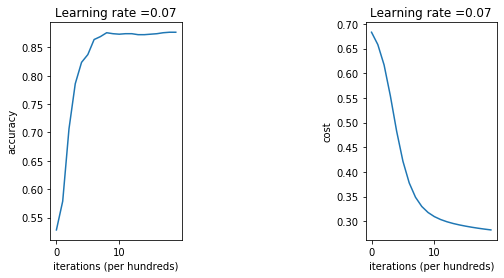

In [48]:
layer_arch = [10,8,1]
learning_rate = 0.1
mode = 'gaussian'
d['Layer Arch'].append(layer_arch)
d['learning_rate'].append(learning_rate)
d['mode'].append(mode)

nn = NerualNetwork(layer_arch,mode=mode)
nn.train(train_x,train_y,print_cost=True)

In [49]:
def evaluation(ytrue, predicted):
    true_pos = sum(1 for p,g in zip(predicted, ytrue) if p==1 and g==1)
    true_neg = sum(1 for p,g in zip(predicted, ytrue) if p==0 and g==0)
    false_pos = sum(1 for p,g in zip(predicted, ytrue) if p==1 and g==0)
    false_neg = sum(1 for p,g in zip(predicted, ytrue) if p==0 and g==1)
    data = {'y_Actual' : ytrue , 'y_Predicted' : predicted}
    try:
        recall = true_pos / float(true_pos + false_neg)
    except:
        recall = 0
    try:
        precision = true_pos / float(true_pos + false_pos)
    except:
        precision = 0
    try:
        fscore = 2*precision*recall / (precision + recall)
    except:
        fscore = 0
    try:
        accuracy = (true_pos + true_neg) / float(len(ytrue))
    except:
        accuracy = 0
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True,fmt="d")
    plt.title("Confusion Matrix")
    plt.show()
    return accuracy, precision, recall, fscore    

### Evalution the model on testing dataset

Accuracy on testing dataset :  0.910958904109589


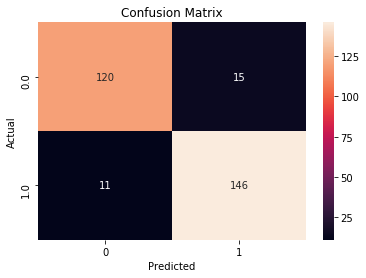

In [50]:
pred,result = nn.predict(test_x,test_y,ret_out=True)
print("Accuracy on testing dataset : ",result)
acc,presion,recall,fscore = evaluation(pred[0],test_y[0])
d['Testing Acc'].append(acc)
d['Precision'].append(presion)
d['Recall'].append(recall)
d['F-Score'].append(fscore)
d['Training Acc'].append(nn.predict(train_x,train_y,ret_out=False))

In [34]:
x = PrettyTable()
x.field_names = ["Layer Arch","mode","learning_rate","Training Acc","Testing Acc", "Precision", "Recall","F-Score"]
for i in zip(*d.values()):
    x.add_row(i)
print(x)

+---------------+----------+---------------+--------------+-------------+-----------+--------+---------+
|   Layer Arch  |   mode   | learning_rate | Training Acc | Testing Acc | Precision | Recall | F-Score |
+---------------+----------+---------------+--------------+-------------+-----------+--------+---------+
|   [10, 8, 1]  | uniform  |      0.01     |     0.88     |     0.91    |    0.91   |  0.92  |   0.92  |
|   [10, 8, 1]  | gaussian |      0.01     |     0.88     |     0.91    |    0.91   |  0.93  |   0.92  |
| [10, 8, 4, 1] | uniform  |      0.01     |     0.88     |     0.9     |    0.89   |  0.93  |   0.91  |
| [10, 8, 4, 1] | gaussian |      0.01     |     0.89     |     0.9     |    0.89   |  0.93  |   0.91  |
|   [10, 8, 1]  | gaussian |      0.1      |     0.88     |     0.91    |    0.91   |  0.93  |   0.92  |
+---------------+----------+---------------+--------------+-------------+-----------+--------+---------+
